In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = r"Crop_recommendation.csv"
df = pd.read_csv(path)
df.sample(15)

N   P   K  temperature   humidity        ph    rainfall        label
555    30  41  15    24.832066  44.170850  5.885097   52.081089    mothbeans
596    22  51  16    27.965837  61.349001  8.639586   70.104721    mothbeans
1019  117  86  48    28.695620  82.541958  6.225225  116.161684       banana
105    68  41  16    21.776893  57.808406  6.158831  102.086169        maize
461    20  77  23    34.872487  38.837860  5.180272  148.250279   pigeonpeas
2095   87  44  43    23.874845  86.792613  6.718725  177.514731         jute
664    14  41  17    29.129395  88.483126  7.085982   36.450128     mungbean
1882   31  13  33    29.699523  95.212244  6.342464  148.300369      coconut
1657   12  20  10    24.451328  93.105277  6.528355  109.471110       orange
1176   14  18  35    31.091542  47.020584  4.791147   91.466643        mango
304     2  61  20    22.139747  23.022511  5.955617   76.641283  kidneybeans
1047   90  86  52    25.850370  81.955805  5.793260  119.085617       banana
123    83  45  21    18.833445  58.750820  5.716223   79.753290        maize
999     8  28  37    23.884048  86.206138  6.082572  108.312179  pomegranate
514    23  45  21    31.465113  51.799394  8.985348   74.443307    mothbeans

In [9]:
print("SHAPE : ", df.shape)
df.info()

SHAPE :  (2200, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [ ]:
df["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:

numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

continuous_features=[feature for feature in numerical_features if feature not in discrete_features]

print("Continuous Variables : ",continuous_features)

Discrete Variables :  []
Continuous Variables :  ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


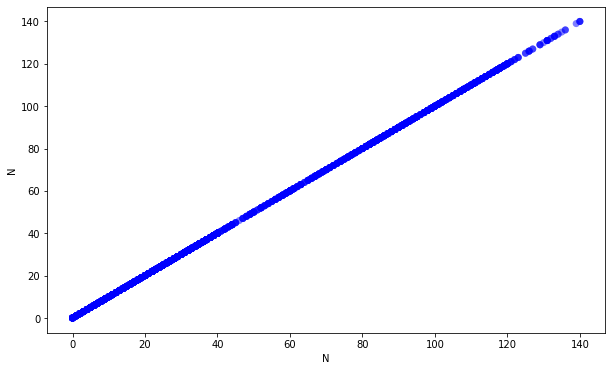

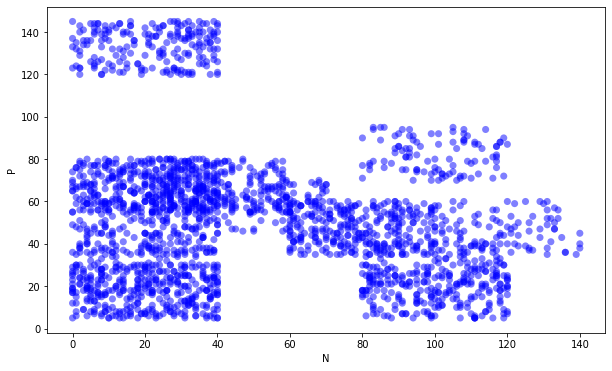

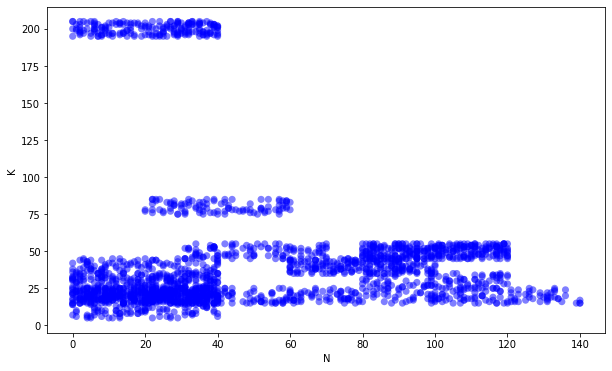

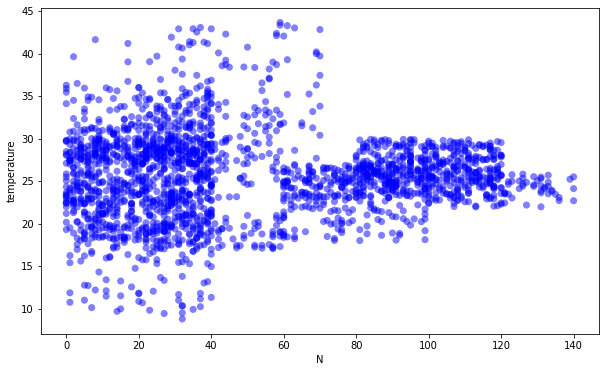

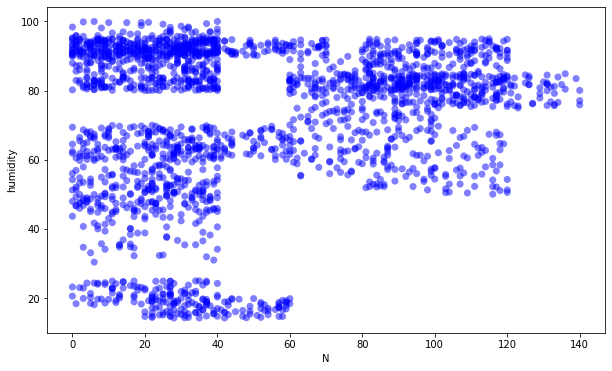

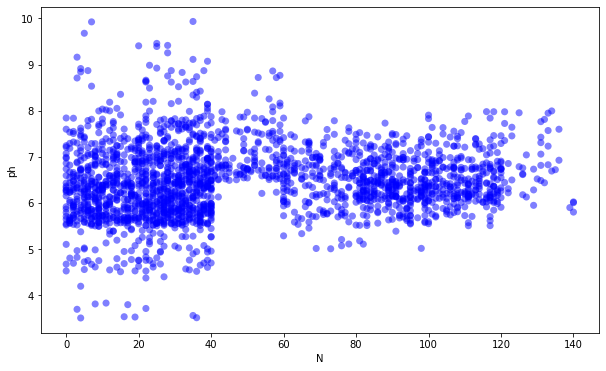

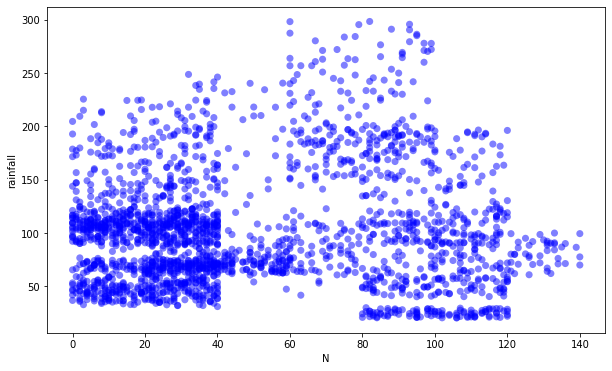

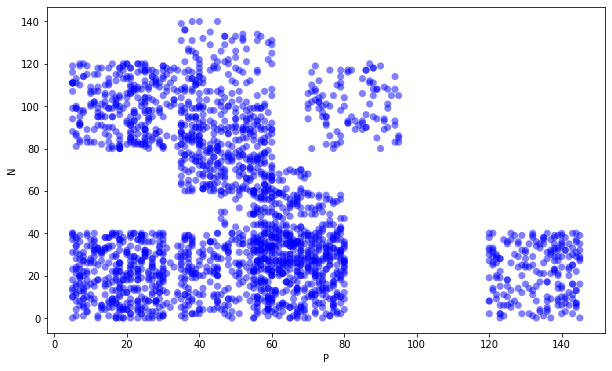

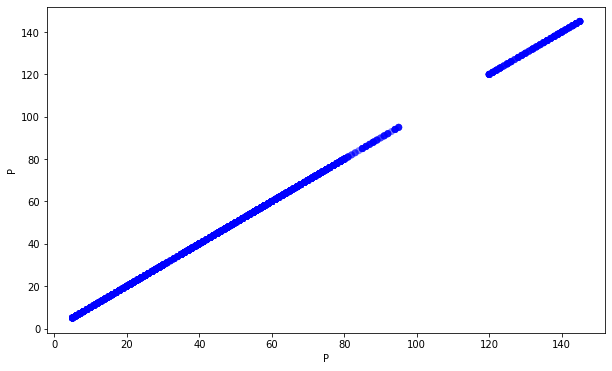

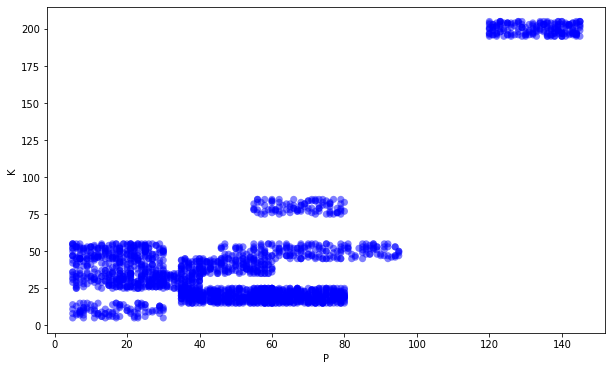

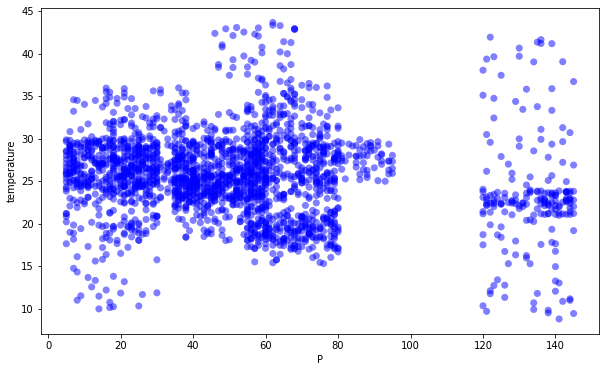

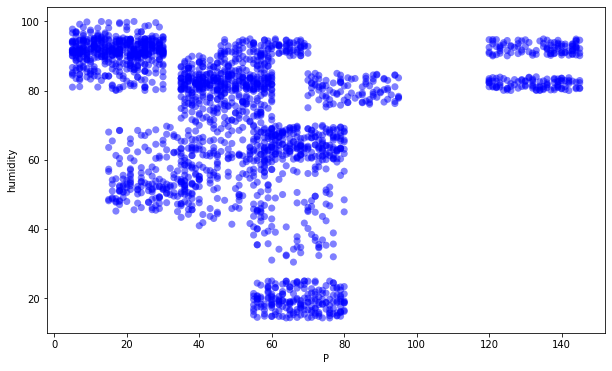

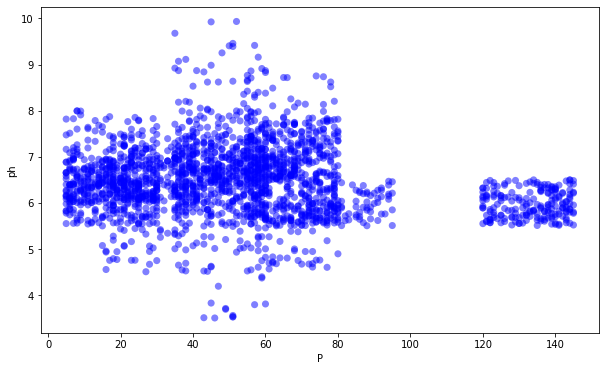

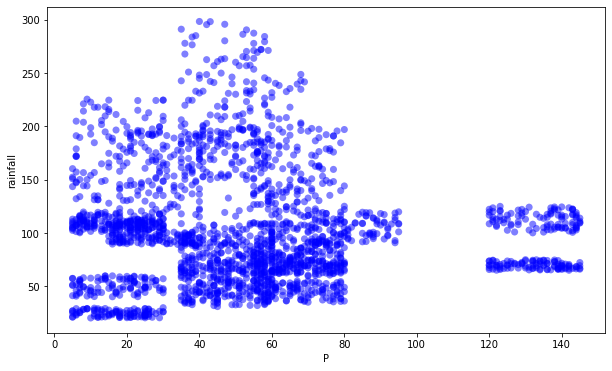

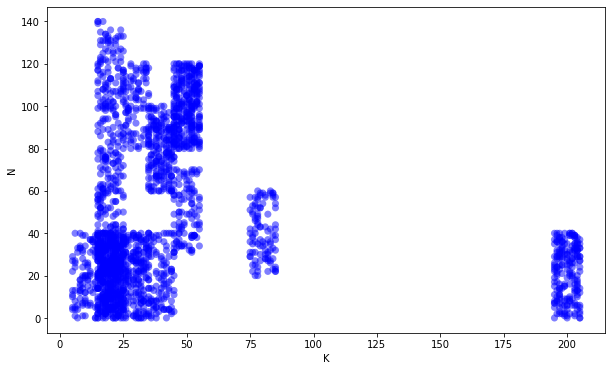

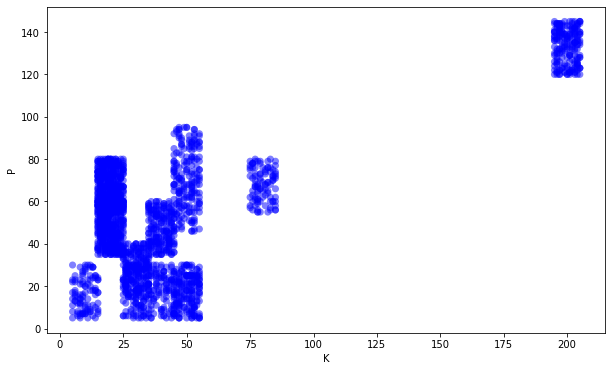

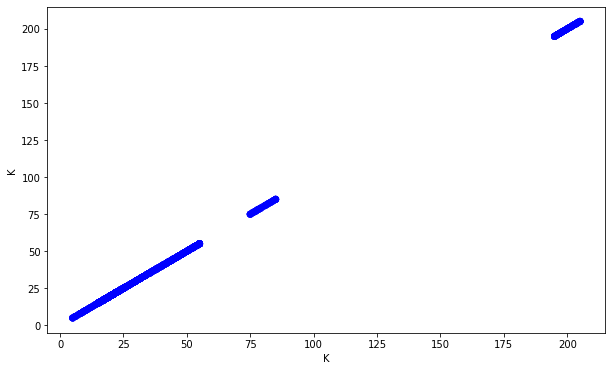

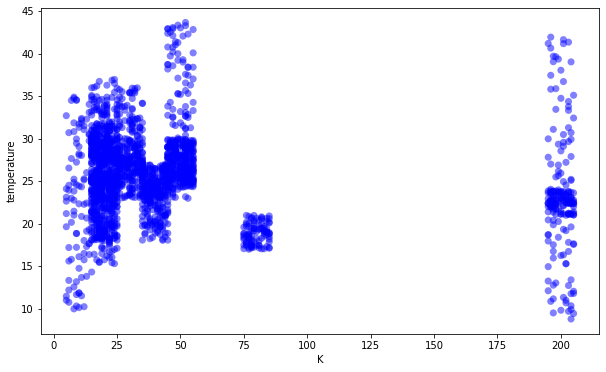

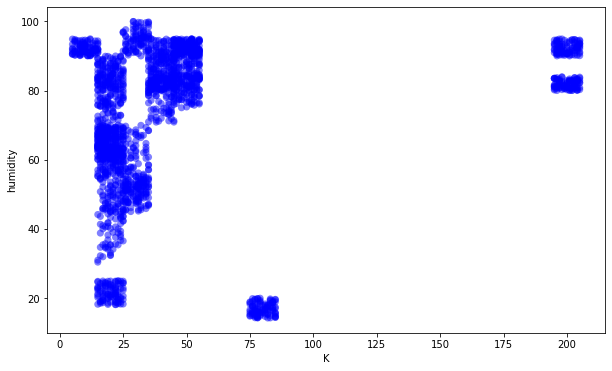

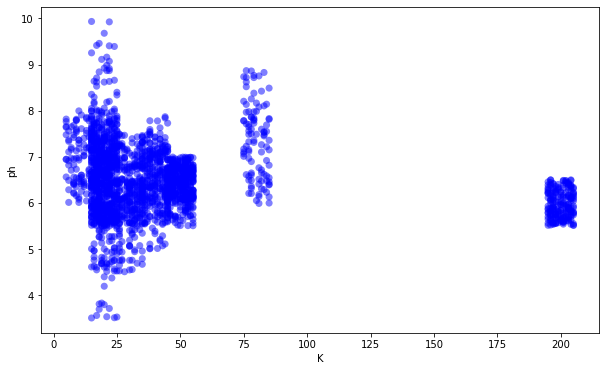

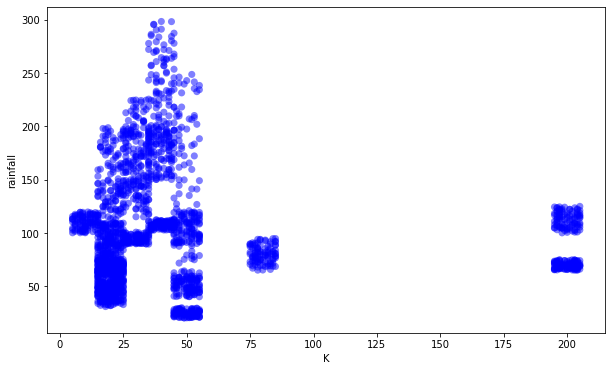

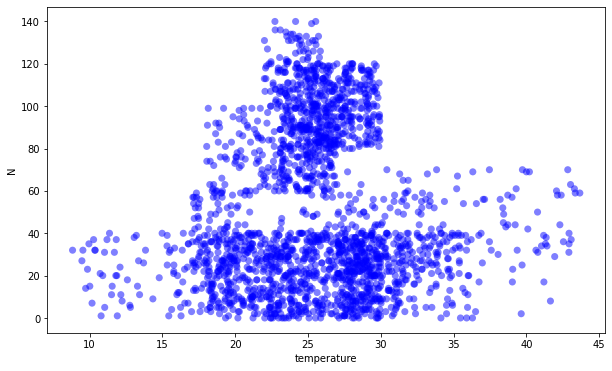

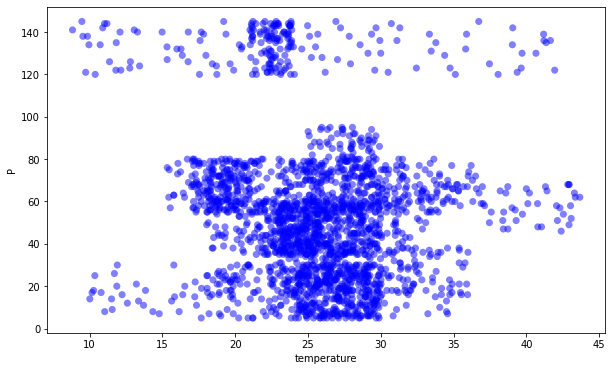

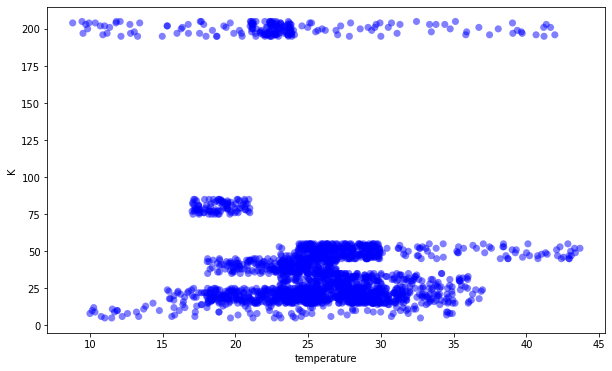

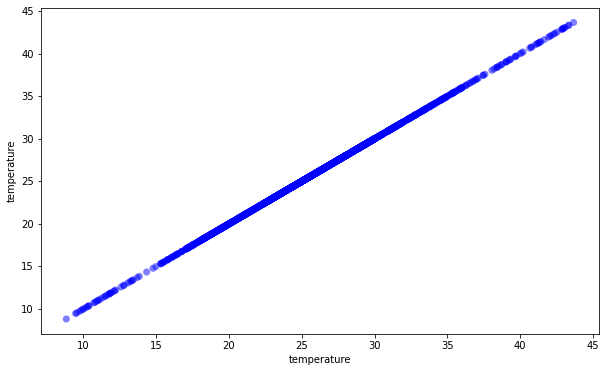

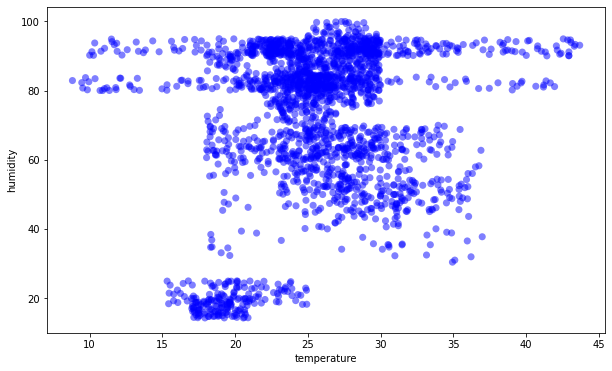

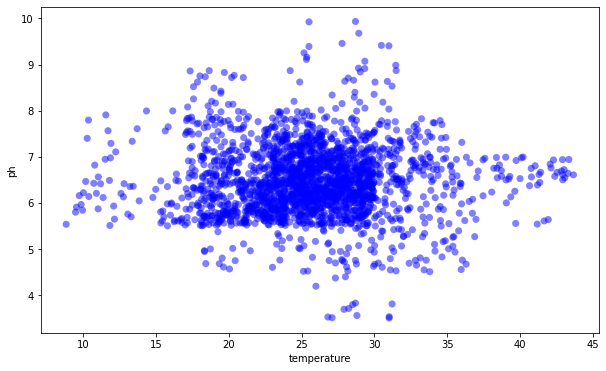

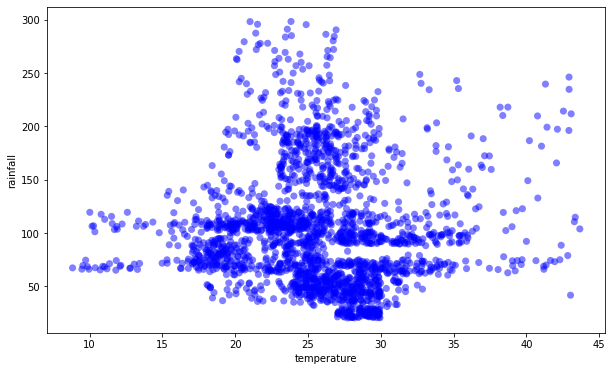

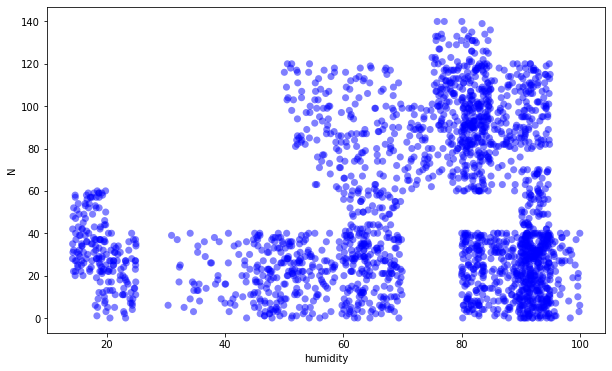

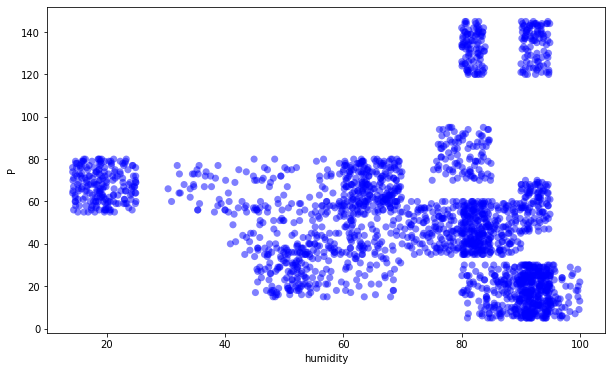

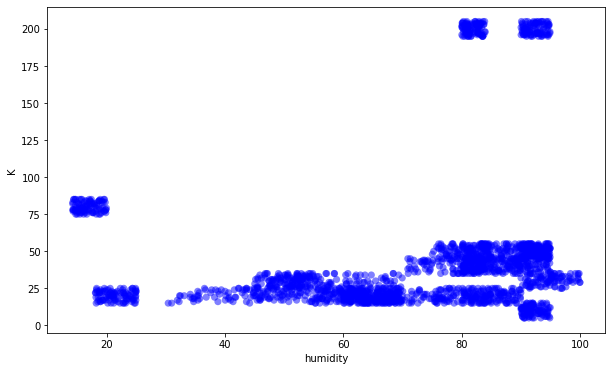

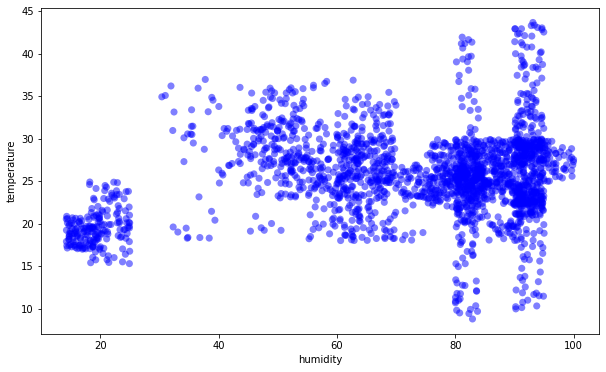

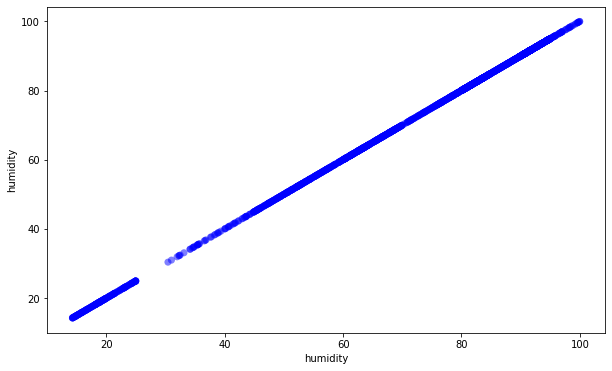

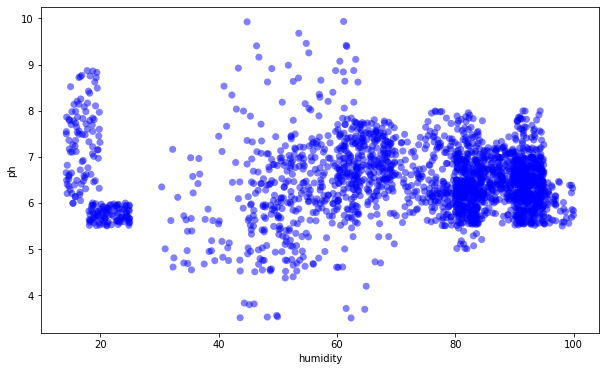

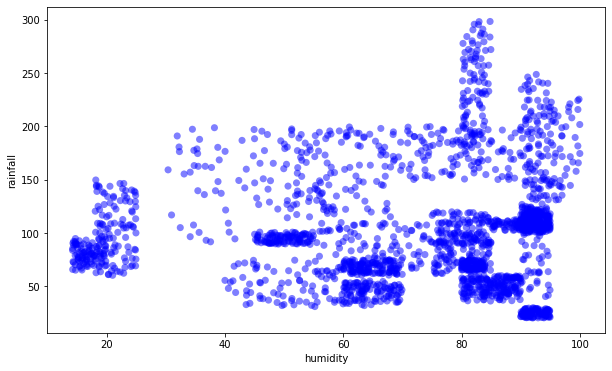

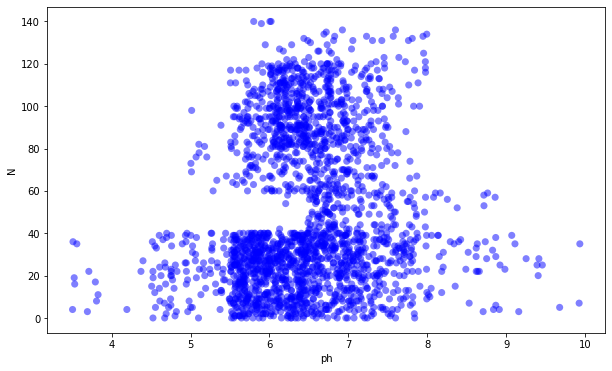

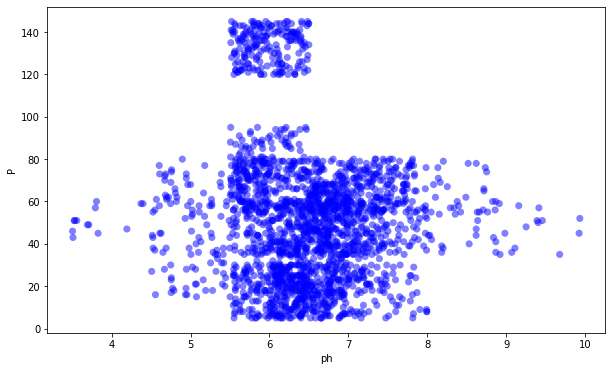

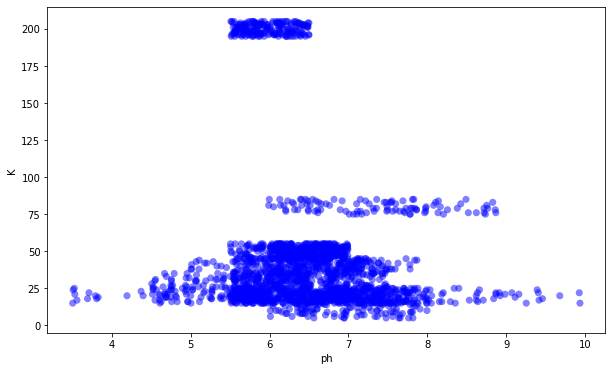

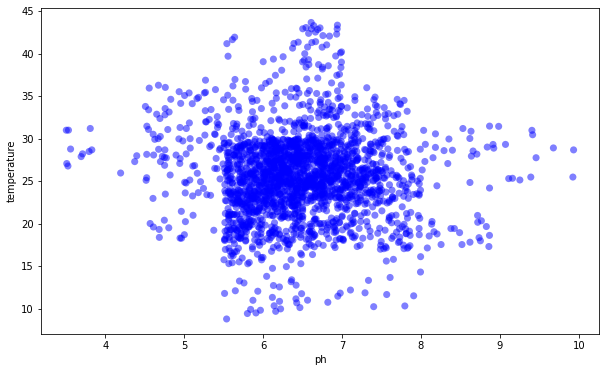

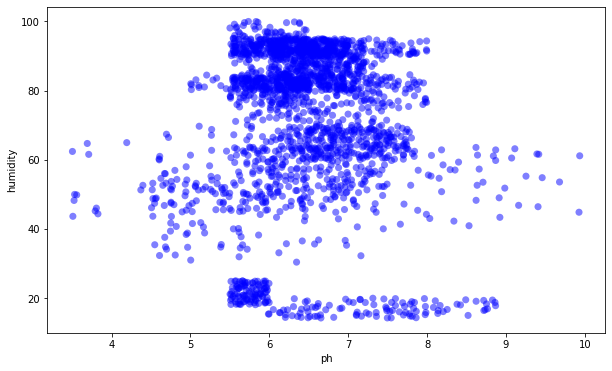

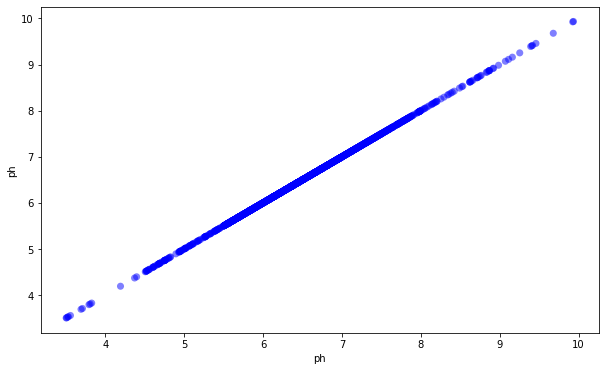

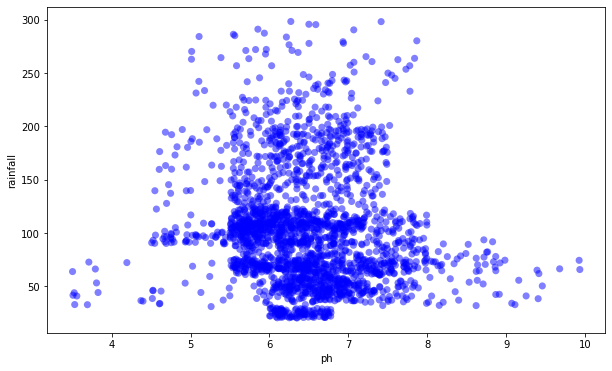

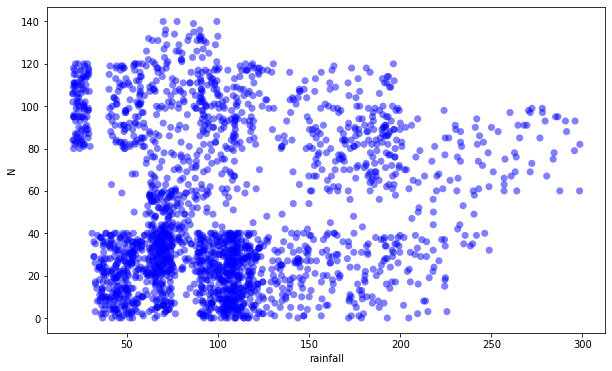

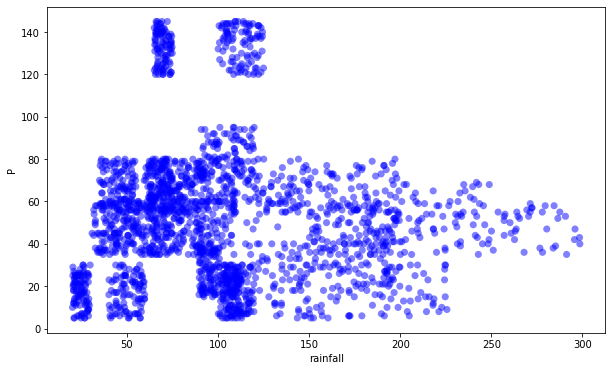

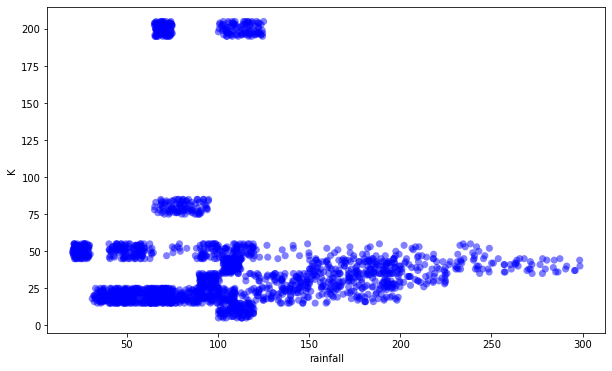

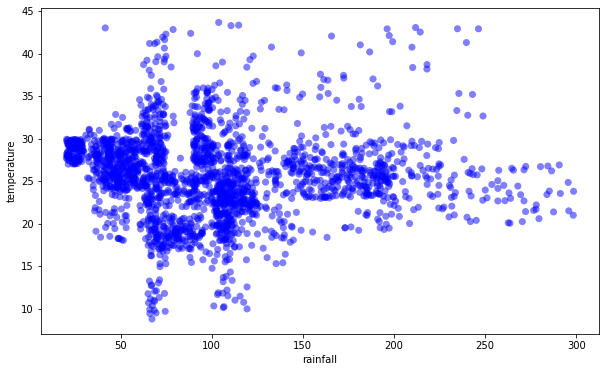

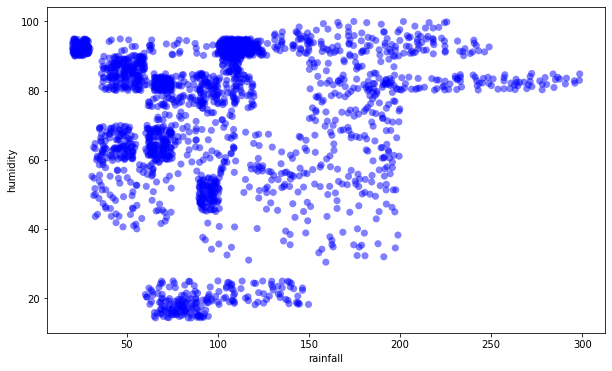

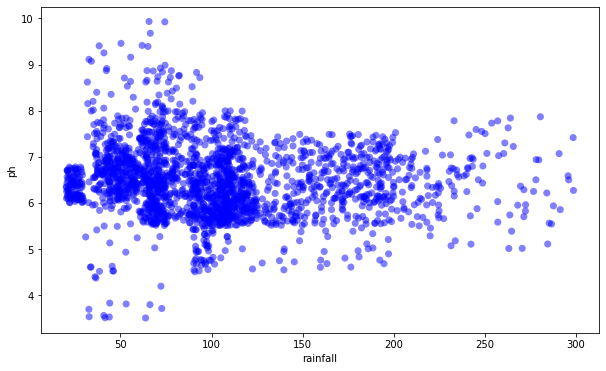

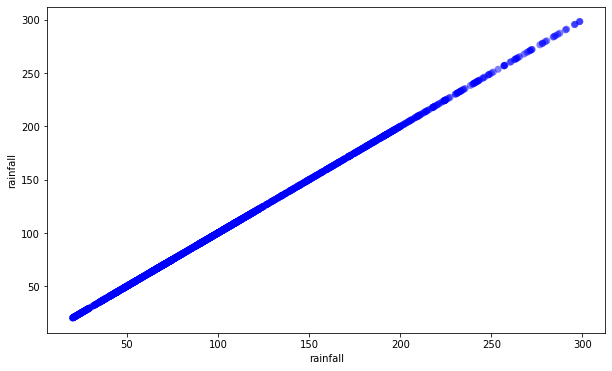

In [ ]:
for feature1 in continuous_features:
    for feature2 in continuous_features:
            data=df.copy()
            plt.figure(figsize=(10,6))  # specify figure size
            plt.scatter(df[feature1], df[feature2], s=50, 
                        marker='o',  # use circle markers
                        c='b',       # set marker color to blue
                        alpha=0.5,   # set transparency level
                        edgecolors='none')  # remove marker borders
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.show()

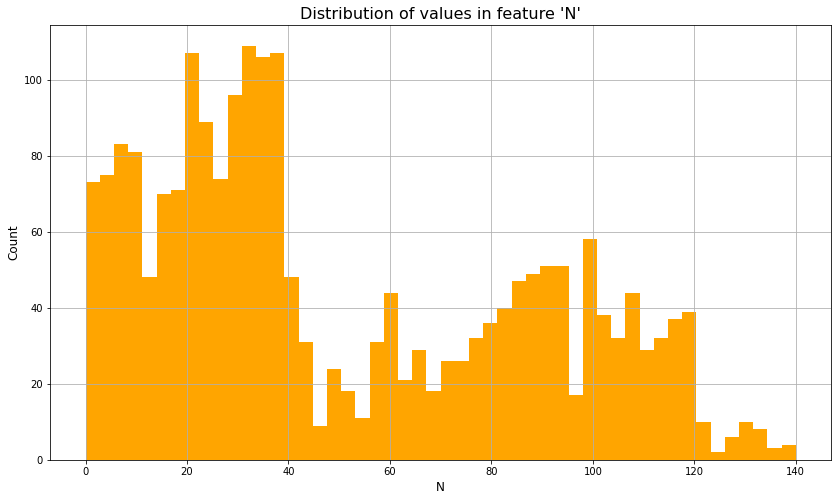

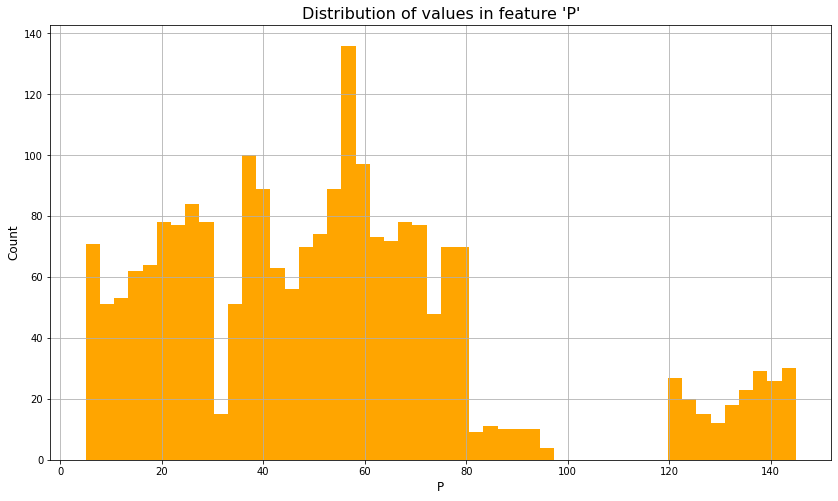

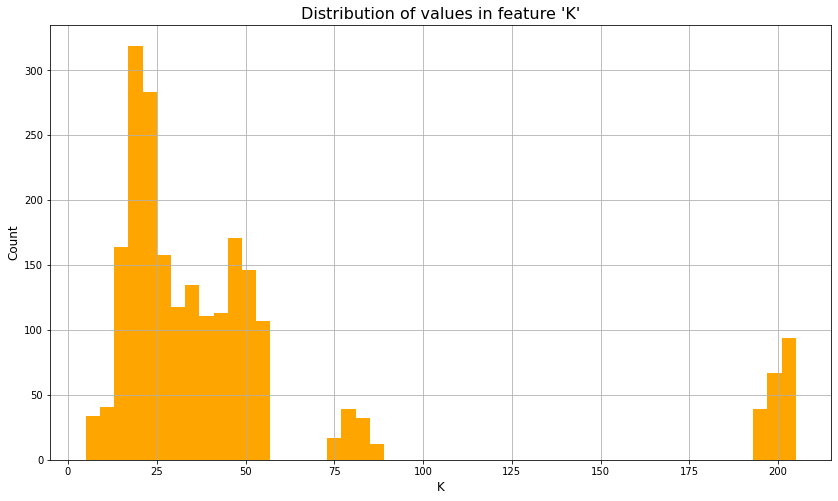

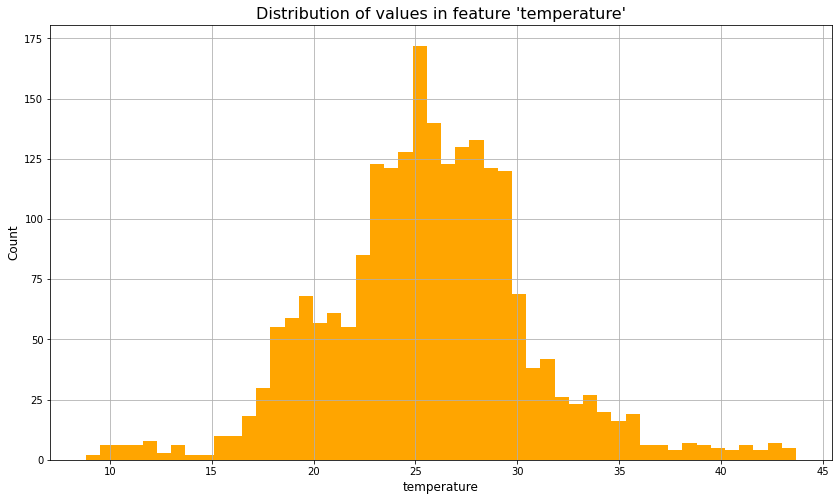

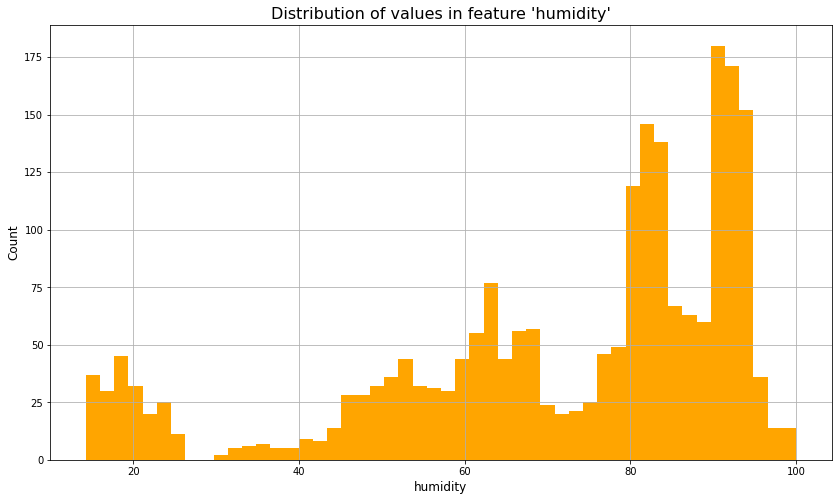

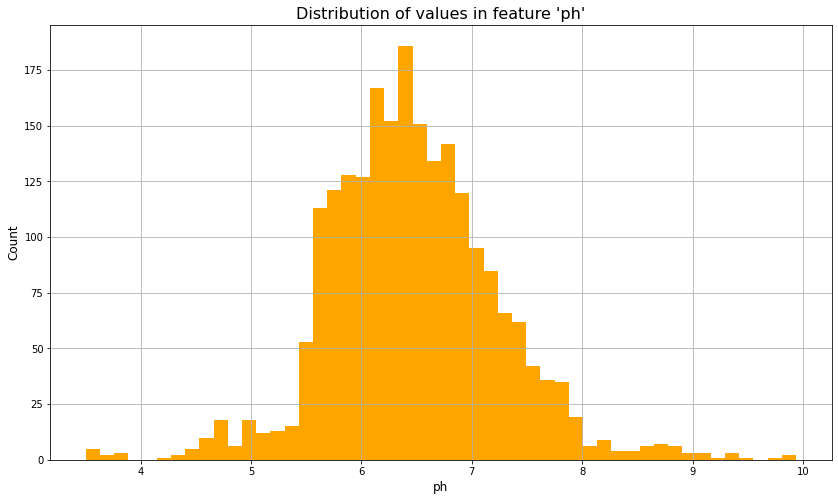

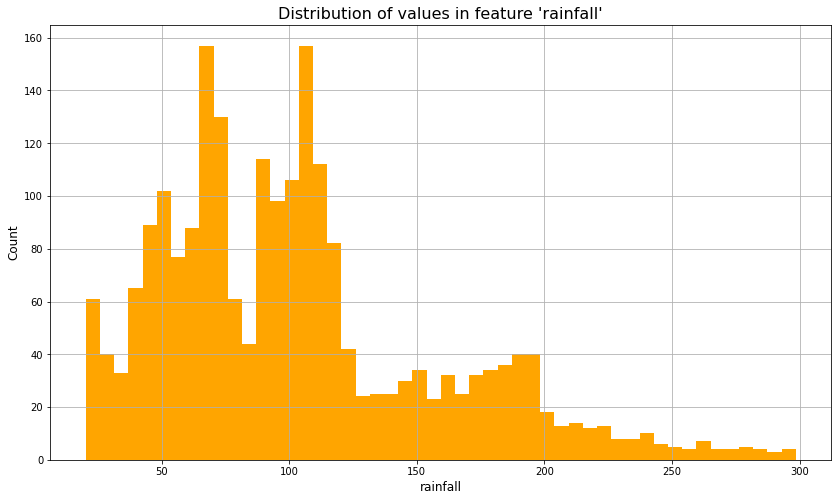

In [21]:
# Find the Distribution of values in each Continuous feature (create histograms)
for feature in continuous_features:
  # Set the figure size
  plt.subplots(figsize=(14, 8))

  # Increase the number of bins
  data[feature].hist(bins=50, color='orange')

  # Add a title
  plt.title("Distribution of values in feature '" + feature + "'", fontsize=16)

  # Adjust the axes labels
  plt.xlabel(feature, fontsize=12)
  plt.ylabel("Count", fontsize=12)

  plt.show()

## **Model Training**

In [189]:
x = df.drop("label", axis=1)
y = df["label"]

print(x.shape)
x.sample(10)

(2200, 7)


N   P   K  temperature   humidity        ph    rainfall
1647    9  10  10    22.355105  93.522119  6.010392  101.516459
601     8  54  20    28.334043  80.772760  7.034214   38.797641
1745   42  60  47    33.468737  92.127462  6.834808  136.827704
792    29  63  17    30.026299  67.888116  7.261543   66.472646
1456  118  12  47    27.968723  92.174448  6.010740   28.947669
1737   65  62  51    31.532438  90.873949  6.511625  207.073512
625    34  45  21    28.188371  82.606297  6.287380   37.011104
1486   85  21  47    29.873311  90.609325  6.186770   24.697205
1700   61  68  50    35.214628  91.497251  6.793245  243.074507
1409  108  26  52    28.826290  94.267653  6.201798   26.238385

In [190]:
print(y.shape)
y.sample(10)

(2200,)


361     kidneybeans
640        mungbean
1720         papaya
952     pomegranate
923     pomegranate
147           maize
1093         banana
1260         grapes
513       mothbeans
1840        coconut
Name: label, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,shuffle=True)

In [ ]:
import lightgbm as lgb

model = lgb.LGBMClassifier()

model.fit(x_train,y_train)

LGBMClassifier()

In [266]:
output = model.predict([[101,10,47,25.5421695,83.31883376,6.936997681,57.57343233]])
print("Predicted Crop : ",output[0])

Predicted Crop :  watermelon


In [ ]:
model.booster_.save_model('lgbm_model.txt')